# Black-Scholes

## The problem

We have a **financial asset** whose value at a time $t$ is $S(t)$. The volatility of the asset will be $\sigma$. The **risk free rate** will be $r$. Under this considerations we are going to create a **financial product** based on the evolution of the underlying wich a definite duration time (**maturity**): $T$. This product will be characterized by its **return** that will be a function that will depends of the price of the underlying and of the *maturity*:  $f=f(S(t), T)$. The question is: **What is the price of our financial product at a time t when underlying is S(t): $V_f(S(t), t)$?**.

So we have:

* $S = S(t)$ price of the underlying at $t$.
* $\sigma$ volatility of the underlying.
* *Risk free rate*: $r$
* Return of the financial product: $f=f(S(t), T)$.

And we want:

* $V_f(S(t), t)$


## Black-Scholes Model

One model for obtaining this $V_f(S(t), t)$ is the **Black-Scholes** which relies in the following assumptions:

1. The underlying $S(t)$ follows a lognormal random walk.
2. The risk-free interest rate $r$ is a known function of time $t$.
3. There are no divindends on the underlying $S$
4. Dynamic **delta Hedging** (risk elimination strategy)
5. No arbitrage oppotunities.

Under this condition the Black-Scholes equation relates underlying $S$ with the price of the financial product $V$:

$$\frac{\partial V}{\partial t}+\frac{1}{2}\sigma^2S^2\frac{\partial^2 V}{\partial^2 S} + rS\frac{\partial V}{ \partial S} - rV = 0$$

## Price of financial product

So far we have:

1. Financial asset with value $S(t)$, volatility $\sigma$, and risk free rate $r$
2. Financial product over the financial asset $S$ with a maturity $T$ and a return of $f=f(S(t), T)$

Under the **Black-Scholes** equation, the value of our *financial product* at time $t$ and correspondient underlying $S(t)$ will be given by the following equation:

$$V(t, S(t)) = e^{r(T-t)} \mathbb{E}_{P_{BS}}[f(S_T)]$$

Where 

* $S_T$ is the value of the underlying asset at the *maturity* time $T$.
* $\mathbb{E}_{P_{BS}}[f(S_T)]$ is the expected value of the return of the *financial product* at maturity time $T$ and asset value $S_T$ when $S_T$ follows a **Black-Scholes** probability density, $P_{BS}$.

The **Black-Scholes** probability density, $P_{BS}$ is given by:

$$P_{BS} (S_T; t, S(t)) = \frac{1}{S_T\sigma\sqrt{2\pi(T-t)}}exp\big({-\frac{(\log S_T -\mu)^2}{2\sigma^2(T-t)}}\big)$$

and

$$\mu = (r-\frac{1}{2}\sigma^2)(T-t)+\log S(t)$$

The $P_{BS}$ give us the probability density of the underlying value at the maturity time $T$, $S_T$, when for a time $t$ the underlaying have a value $S(t)$ (following the **Black-Scholes** equation).

So the price of the financial product for $t$ and $S(t)$  will be:

$$V(t, S(t))= e^{r(T-t)} \mathbb{E}_{P_{BS}}[f] =  e^{r(T-t)} \int_0^\infty P_{BS} (S_T; t, S(t)) f(S_T)dS_T$$


The *return* of the financial product at the maturity time is the **Payoff** of the product: $f(S_T) = Payoff(S_T)$.



## Using Quantum Amplitude Amplification

For calculating the price of the *financial product* at a time $t$ and an underlying $S(t)$ we need to compute the expectaction of a function $f(x)$ (the payoff) when x follows a distribution probability $p(x)$ (in the case of the *Black-Scholes* this will be the **Black-Scholes** probability density):

$$\mathbb{E}[f]=\int_a^bp(x)f(x)dx$$

As explained in other Notebooks we can use the *Quantum Amplification Amplitud* algorithm for calculating this value. In these Notebook we are going to use the different algorithms for computing this value for several *financial products* (for different $f(x)$ functions).


In [1]:
import sys
sys.path.append("../../")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import qat.lang.AQASM as qlm
from copy import deepcopy

In [2]:
#This cell loads the QLM solver.
#QLMaaS == False -> uses PyLinalg
#QLMaaS == True -> try to use LinAlg (for using QPU as CESGA QLM one)
from QQuantLib.utils.qlm_solver import get_qpu
QLMaaS = False
linalg_qpu = get_qpu(QLMaaS)

Using PyLinalg


## 1. European Vanilla Call Option

A Vanilla European Call Option is financial product which allows the holder to buy an underlying asset S at a maturity time $T$ at a fixed price $K$ (**strike**) independetly of the value of $S_T$. The return of this option at a time $t$ is:

$$f(t, K) = \max(0, S(t)-K)$$

And the final payoff (the return at the maturity time $T$) will be:

$$Payoff(S_T)= \max(0, S_T-K)$$

Under the *Black-Scholes* probability density, a asset volatility $\sigma$ and free risk-rate $r$ the price of a call option at $t=0$ and $S(t=0)=S_0$ will be:

$$V(S_0)=  e^{rT} \int_0^\infty P_{BS} (S_T; S_0) Payoff(S_T)dS_T$$

where

$$P_{BS} (S_T; S_0) = \frac{1}{S_T\sigma\sqrt{2\pi T}}exp\big({-\frac{(\log S_T -\mu)^2}{2\sigma^2 T}}\big)$$

and 
$$\mu = (r-\frac{1}{2}\sigma^2)T+\log S_0$$


We are going to use our different *Quantum Amplitude Amplification* (**QAA**) algorithms to calculate $V(S_0)$ and compare between them and with the classical soltuion (see Below).

We are going to use the functions *bs_probability* and *call_payoff* from **QQuantLib/utils/utils** module for the **Black-Scholes** probability density and the return of the Vanilla European Call option respectively

In [3]:
from QQuantLib.utils.utils import bs_probability, call_payoff

In [4]:
#Parameters of out model
S0 = 2
r = 0.04
sigma = 0.1
#Maturity of the call option 
T = 300/365 #300 days
#Strike
K = 1.9

In [5]:
n_qbits = 5
x = np.linspace(1,3,2**n_qbits)
prob_bs = bs_probability(x,S0,r,sigma,T)
payoff_call = call_payoff(x, K)

Text(0.5, 1.0, 'Black-Scholes Probability density. r= 0.04 $\\sigma$= 0.1. $S_0$= 2')

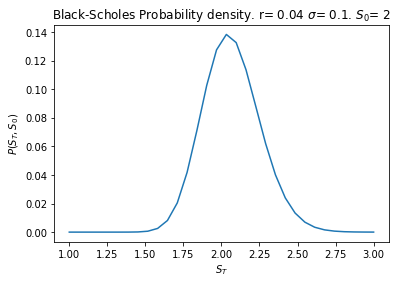

In [6]:
#Black-Scholes Probability density
plt.plot(x, prob_bs)
plt.xlabel(r'$S_T$')
plt.ylabel(r'$P(S_T, S_0)$')
plt.title(r'Black-Scholes Probability density. r= {} $\sigma$= {}. $S_0$= {}'.format(r, sigma, S0))

Text(0.5, 1.0, 'European Call Option Payoff. K= 1.9')

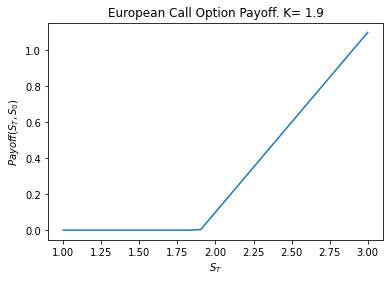

In [7]:
#European Call Option Payoff
plt.plot(x, payoff_call)
plt.xlabel(r'$S_T$')
plt.ylabel(r'$Payoff(S_T, S_0)$')
plt.title(r'European Call Option Payoff. K= {}'.format(K))

The value for an European Call Option under the **Black-Scholes** model has an exact solution:
 
$$V(S(t), t)= S(t)*\Phi(d_1)-Ke^{-r*(T-t)}\Phi(d_2)$$
 
where:

$$d_1 = \frac{log(\frac{S(t)}{K})+(r+\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$
$$d_2 = \frac{log(\frac{S(t)}{K})+(r-\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$
$$\Phi(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x} e^{\frac{-1}{2}\phi^2}d\phi$$

The *bs_call_price* function from **QQuantLib/utils/utils** module implements the price of a European Call Option. The inputs of the function will be:

* $S_0$
* Risk free rate: $r$
* Volatility $\sigma$
* Maturity: $T$
* Strike $K$

In [8]:
from QQuantLib.utils.utils import bs_call_price

In [9]:
exact_price = bs_call_price(S0,r,sigma,T,K)
print(exact_price)

0.17800839685172676


## Quantum Staff

For using the different **QAA** algorithms of the **QQuantLib** first thing we allways need (see Notebooks 03_MaximumLikelihood_Class.ipynb, 04_PhaseEstimationwitQFT_Class.ipynb, 05_Iterative_QPE_Class.ipynb and 07_IQAE_RQAE.ipynb) is an oracle where the probability and the return function are loaded.

For creating this oracle we use *load_probability* and *load_array* functions from **QQuantLib/DL/data_loading**


In [10]:
from QQuantLib.DL.data_loading import load_probability, load_array, uniform_distribution

It is mandatory that $p(x)$ and $f(x)$ were properly normalized. Following conditions should be fullfilled:

* For $p(x)$ is mandatory that: $\sum_{i=0}^{2^{n}} p(x_i) = 1$
* For $f(x)$ is mandatory that: $f(x_i) \leq 1 \forall i$

In [11]:
#Test condition in p(x)
print('p(x) condition: {}'.format(np.isclose(np.sum(prob_bs),1.0)))
print('f(x) condition: {}'.format(np.max(payoff_call) <= 1))

p(x) condition: True
f(x) condition: False


In [12]:
#we need to normalize payoff_call

payoff_call_nomalised = payoff_call/np.max(payoff_call)
print('f(x) condition: {}'.format(np.max(payoff_call_nomalised) <= 1))

f(x) condition: True


In [13]:
#Now we can create the Oracle

p_gate = load_array(prob_bs)
f_gate = load_array(np.sqrt(payoff_call_nomalised))
oracle = qlm.QRoutine()
register = oracle.new_wires(f_gate.arity)
oracle.apply(p_gate, register[:p_gate.arity])
oracle.apply(f_gate, register)

Additionally we need to provide what will be the target and the index of the qbits where the Grover operator will be applied

In [14]:
target = [0]
index = [oracle.arity-1]

In [15]:
%qatdisplay oracle

RuntimeWarning('Command "pdflatex" is not installed. The circuit will be displayed in SVG. (Please use "--svg" option to remove this warning)')

We are going to solve the expected value problem using:

1. Maximum Likelihood method.
2. Classical QPE with QFT (AE_PhaseEstimationwQFT)
3. Iterative QPE
4. Iterative QAE
5. RQAE

### Maximum Likelihood

In [ ]:
from QQuantLib.AE.maximum_likelihood_ae import MLAE

In [ ]:


mlae_dict = {
    'qpu': linalg_qpu,
}
mlae = MLAE(
    deepcopy(oracle),
    target = target,
    index = index, 
    **mlae_dict
)

In [ ]:
mlae.run()

### Classical QPE with QFT

In [ ]:
from QQuantLib.PE.phase_estimation_wqft import AE_PhaseEstimationwQFT

In [ ]:
ae_pe_withQFT_dict = {
    'qpu': linalg_qpu,
    'auxiliar_qbits_number': 4,
    'shots': 10
}

ae_pe_withQFT = AE_PhaseEstimationwQFT(
    oracle=deepcopy(oracle),
    target=target,
    index=index, 
    **ae_pe_withQFT_dict
)

In [ ]:
ae_pe_withQFT.run()

### Iterative QPE

In [ ]:
from QQuantLib.PE.iterative_quantum_pe import AE_IterativeQuantumPE

In [ ]:
ae_pe_iqpe_dict = {
    'qpu': linalg_qpu,
    'cbits_number': 4,
    'shots': 10
}

ae_pe_iqpe = AE_IterativeQuantumPE(
    oracle=deepcopy(oracle),
    target=target,
    index=index, 
    **ae_pe_iqpe_dict
)

In [ ]:
ae_pe_iqpe.run()

### Iterative QAE

In [ ]:
from QQuantLib.AE.iterative_quantum_ae import IQAE

In [ ]:
epsilon = 0.001
N = 100
alpha = 0.05

iqae_dict = {
    'epsilon': epsilon,
    'N': N,
    'alpha': alpha
}

iqae = IQAE(
    oracle=deepcopy(oracle), 
    target = target, 
    index = index, 
    **iqae_dict
)

In [ ]:
iqae.run()

### RQAE

In [ ]:
from QQuantLib.AE.real_quantum_ae import RQAE

In [ ]:
rqae = RQAE(
    oracle=deepcopy(oracle), 
    target = target, 
    index = index, 
)    

In [ ]:
rqae.run()

In [ ]:
#Now we can create the Oracle

h_gate = uniform_distribution()
f_gate = load_array(np.sqrt(payoff_call_nomalised))
oracle = qlm.QRoutine()
register = oracle.new_wires(f_gate.arity)
oracle.apply(p_gate, register[:p_gate.arity])
oracle.apply(f_gate, register)

In [ ]:
oracle3 = qlm.QRoutine()
register3 = oracle3.new_wires(n_qbits+2)
oracle3.apply(uniform_distribution(n), n_qbits)

p_gate = load_array(prob_bs)
f_gate = load_array(payoff_call_nomalised)